In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score,auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_excel("Applicant-details.xlsx")

In [42]:
df = df.sample(frac=1)
df

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
35705,70669,1609239,47,3,single,rented,no,Flight_attendant,Tumkur,Karnataka,3,14,0
31930,52103,8442438,23,17,single,norent_noown,no,Mechanical_engineer,Hindupur,Andhra_Pradesh,3,14,0
52884,45086,8217987,56,13,single,rented,yes,Graphic_Designer,Kolhapur,Maharashtra,8,14,0
30733,99115,242890,78,12,single,rented,no,Scientist,Karnal,Haryana,3,10,0
63889,95485,1677705,42,14,single,rented,no,Industrial_Engineer,Bikaner,Rajasthan,13,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44875,2966,8701440,27,15,married,rented,no,Computer_hardware_engineer,Bharatpur,Rajasthan,5,13,0
35563,26892,2997990,43,7,single,rented,yes,Psychologist,Raiganj,West_Bengal,3,11,0
47171,19917,8171627,67,15,single,rented,no,Biomedical_Engineer,Bidhannagar,West_Bengal,9,12,0
96439,10517,9663578,71,16,single,rented,no,Scientist,Madurai,Tamil_Nadu,11,14,0


## LABEL ENCODING

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])
        
#This is the traget
output = df['Loan_Default_Risk']
df_new = df.drop('Applicant_ID',axis = 1)

##  Model Implementation

In [56]:
test_len = int(len(df_new) * 0.99)

x_columns = df_new.columns.drop('Loan_Default_Risk')

# Train data
x_train = df_new[x_columns].iloc[:test_len]
y_train = df_new['Loan_Default_Risk'].iloc[:test_len]

# Test data
x_test = df_new[x_columns].iloc[test_len:]
y_test = df_new['Loan_Default_Risk'].iloc[test_len:]

In [57]:
#Model implementation

model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluating with an appropriate metric for classification
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.4f}")
print(f"r2 Score: {r2:.4f}")

Accuracy: 0.9130
r2 Score: 0.2550


## Results at different data split lengths

|          | 80%       | 90%       | 95%       | 99%       |
|:-------- |:----------|:----------|:----------|:----------|
| Accuracy | 0.9130    | 0.9138    | 0.9162    | 0.9130    |
| R2 Score | 0.2046    | 0.2108    | 0.2307    | 0.2550    |

## Model Evaluation

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

#This will tell us the number of True positives, False negatives, False positives and True negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Check balance of classes
print("\nClass Distribution in Training Set:")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Test Set:")
print(pd.Series(y_test).value_counts())


Confusion Matrix:
[[841  24]
 [ 63  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       865
           1       0.75      0.53      0.62       135

    accuracy                           0.91      1000
   macro avg       0.84      0.75      0.79      1000
weighted avg       0.91      0.91      0.91      1000


Class Distribution in Training Set:
0    86138
1    12862
Name: Loan_Default_Risk, dtype: int64

Class Distribution in Test Set:
0    865
1    135
Name: Loan_Default_Risk, dtype: int64


## Plots

### Confusion Matrix

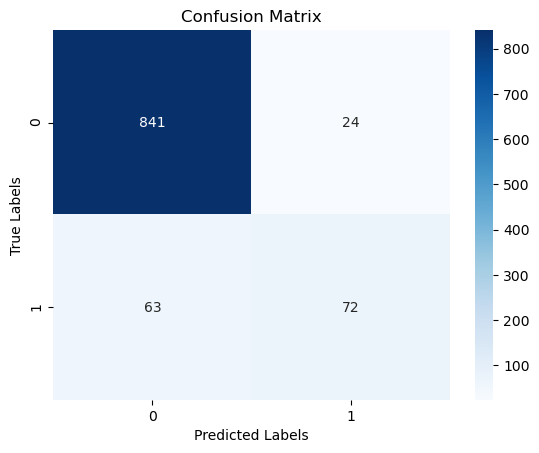

In [59]:
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve & AUC Score

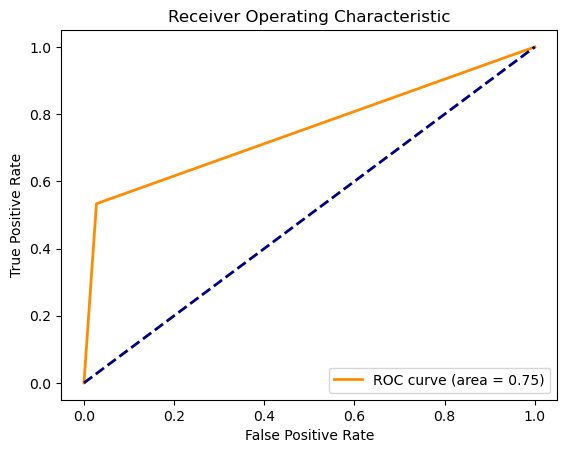

In [60]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Precision Recall Curve

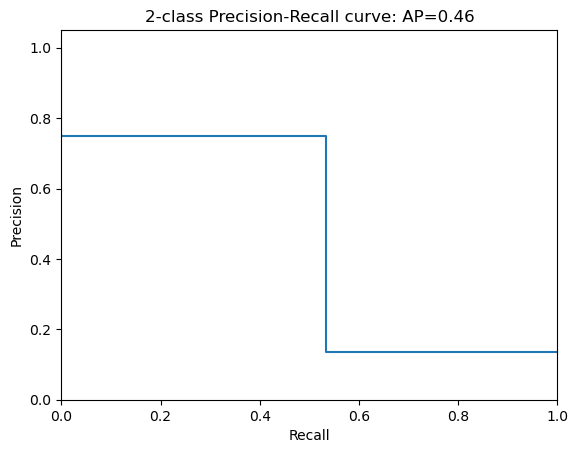

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()
